We try to find an anlytically closed solution of how the liquidity in a channel is being distributed given a certain prior belief about the drain of a channel on the Lightning Network.

This notebook mainly shows some effects and does not yet provide the anlytic solution.

## Acknowledgements 
This notebook was creted by Rene Pickhardt and is a result of very helpful discussions with Krystal Maughan and Sebastian Alscher who are Rene's mentees during the 2022 Summer of Bitcoin. We expect this to be extended to a mathematically more sound theoretical and emperical work during the Summer of Bitcoin 2022.

The research of Rene Pickhardt is funded through NTNU & BitMEX and various doners at https://donation.rene-pickhardt.de and https://www.patreon.com/renepickhardt While the mentees are sponsored by Summer of Bitcoin.

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
number_of_steps = 100_000
capacity = 100
position = 0
go_right = 0.6
go_left = 1 - go_right

In [4]:
number_of_walks = 1_000

positions={n:[] for n in range(number_of_steps)}

for i in range(number_of_walks):
    position=int(random.random()*capacity+0.5)
    for step in range(number_of_steps):
        p = random.random()
        if p < go_right and position < capacity:
            position +=1
        if p >= go_right and position > 0:
            position -= 1
        positions[step].append(position)

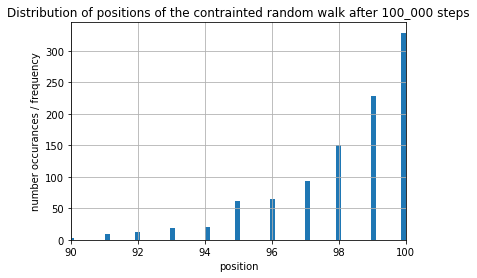

In [5]:
plt.title("Distribution of positions of the contrainted random walk after 100_000 steps")
plt.hist(positions[number_of_steps-1],bins=100)
plt.grid()
plt.xlim(90,100)
plt.xlabel("position")
plt.ylabel("number occurances / frequency")
plt.show()


Text(0, 0.5, 'CDF')

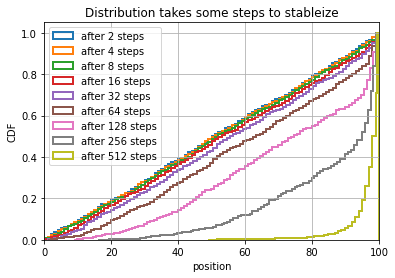

In [8]:
plt.title("Distribution takes some steps to stableize")
for i in range(1,10):
    steps = 2**i
    plt.hist(positions[steps],bins=100,density=True, cumulative=True, histtype="step",linewidth=2, label="after {} steps".format(steps))
plt.legend(loc = "upper left")
plt.grid()
plt.xlim(0,100)
plt.xlabel("position")
plt.ylabel("CDF")

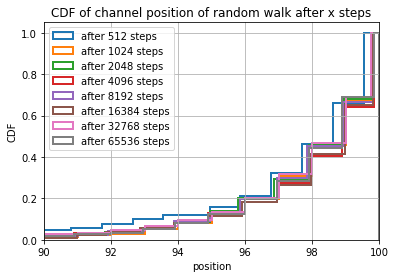

In [46]:
plt.title("CDF of channel position of random walk after x steps")
for i in range(9,17):
    steps = 2**i
    plt.hist(positions[steps],bins=100,density=True, cumulative=True, histtype="step",linewidth=2, label="after {} steps".format(steps))

plt.legend(loc = "upper left")
plt.grid()
plt.xlabel("position")
plt.xlim(90,100)
plt.ylabel("CDF")
plt.show()

## Open Questions

* what if the stepsize is not 1 sat but randomly chosen up to a certain percantage of channel's capacity?
* what if step size is chosen following zipf instead of uniform? (I guess that makes it much better!)
* in all cases (stepsize = 1 , stepsize chosen uniformly, stepsize chosen zipf) describe the histrogram / CDF in an analytically closed way?

### Conjectures
the histrogram will be less skewed if stepsize is not chosen fixed as 1 sat and it will be even better if payment amounts are zipf distributed.

The shape of the histrogram lets us predict our failure rate as we just have to multiply the `go_right` probability with the `CCDF` value for the cases in which a failure is being produced